In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 7.1.21, 7.2.8, 7.6.1

# ======================= 7.1.21  =======================

In [4]:
def f(t, y):
    return y / t - 2 / t**2

t0 = 1.0
y0 = 1.0
T = 2.0 # Видимо опечатка? Написано T = 1.0
h = 0.1

In [5]:
def euler(f, t0, y0, T, h):
    n = int((T - t0) / h)
    t = np.linspace(t0, T, n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + h * f(t[i], y[i])
    return t, y

def rkfixed(f, t0, y0, T, h):
    n = int((T - t0) / h)
    t = np.linspace(t0, T, n+1)
    y = np.zeros(n+1)
    y[0] = y0
    for i in range(n):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 0.5*h, y[i] + h*0.5*k1)
        k3 = f(t[i] + 0.5*h, y[i] + h*0.5*k2)
        k4 = f(t[i] + h, y[i] + h*k3)
        y[i+1] = y[i] + h*(k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

In [6]:
# Compute solutions using both methods
t_euler, y_euler = euler(f, t0, y0, T, h)
t_rk, y_rk = rkfixed(f, t0, y0, T, h)

def exact_solution(t):
    return 1 / t

t_exact = np.linspace(t0, T, 100)
y_exact = exact_solution(t_exact)

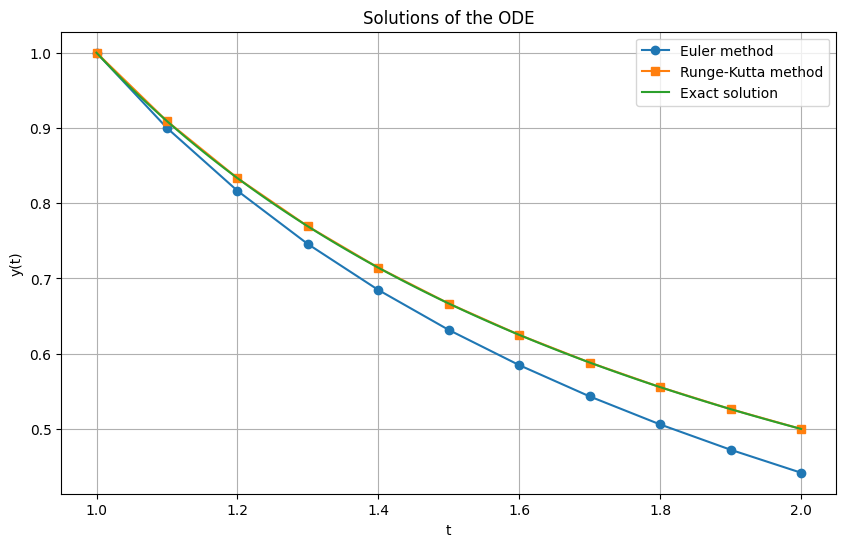

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler, 'o-', label='Euler method')
plt.plot(t_rk, y_rk, 's-', label='Runge-Kutta method')
plt.plot(t_exact, y_exact, '-', label='Exact solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.title('Solutions of the ODE')
plt.grid(True)
plt.show()


In [8]:
def print_table(t, exact, euler, rk):
    print(f"{'t':>8} {'Exact':>13} {'Euler':>15} {'Runge-Kutta':>19}")
    print("="*60)
    for ti, yi_exact, yi_euler, yi_rk in zip(t, exact, euler, rk):
        print(f"{ti:>10.2f} {yi_exact:>15.10f} {yi_euler:>15.10f} {yi_rk:>15.10f}")

# Display the table
print_table(t_euler, exact_solution(t_euler), y_euler, y_rk)

       t         Exact           Euler         Runge-Kutta
      1.00    1.0000000000    1.0000000000    1.0000000000
      1.10    0.9090909091    0.9000000000    0.9090896300
      1.20    0.8333333333    0.8165289256    0.8333311990
      1.30    0.7692307692    0.7456841139    0.7692280099
      1.40    0.7142857143    0.6847012351    0.7142824615
      1.50    0.6666666667    0.6315676498    0.6666629987
      1.60    0.6250000000    0.5847832709    0.6249959651
      1.70    0.5882352941    0.5432072253    0.5882309231
      1.80    0.5555555556    0.5059564393    0.5555508684
      1.90    0.5263157895    0.4723367353    0.5263107998
      2.00    0.5000000000    0.4417949014    0.4999947169


In [9]:
print(f"\nMax absolute error (Euler): {np.max(np.abs(exact_solution(t_euler) - y_euler))}")
print(f"Max absolute error (Runge-Kutta): {np.max(np.abs(exact_solution((t_rk)) - y_rk))}")
# print(f"Runge error (Euler): {error_runge_euler}")


Max absolute error (Euler): 0.058205098593050564
Max absolute error (Runge-Kutta): 5.283077273432468e-06


In [10]:
t_euler_h2, y_euler_h2 = euler(f, t0, y0, T, h/2)
t_rk_h2, y_rk_h2 = rkfixed(f, t0, y0, T, h/2)

def runge_error(y_h, y_h2, p):
    # Calculate the error based on the Runge rule
    y_h2_interpolated = y_h2[::2]
    return np.max(np.abs(y_h - y_h2_interpolated) / (2**p - 1))

# Calculate errors using Runge's rule
error_runge_euler = runge_error(y_euler, y_euler_h2, 1)
error_runge_rk = runge_error(y_rk, y_rk_h2, 4)

print(f"Runge error (Euler): {error_runge_euler}")
print(f"Runge error (Runge-Kutta): {error_runge_rk}")

Runge error (Euler): 0.02905454833370391
Runge error (Runge-Kutta): 3.297372018614316e-07


In [11]:
def error(t, y):
    return np.max(np.abs(exact_solution(t) - y))

h_star = h
t_euler, y_euler = euler(f, t0, y0, T, h_star)

while error(t_euler, y_euler) >= error(t_rk, y_rk):
    h_star = h_star / 2
    t_euler, y_euler = euler(f, t0, y0, T, h_star)
print(f"h* = {h_star}")

h* = 6.103515625e-06


# ======================= 7.2.8 =======================


In [12]:
# Параметры
H = 1
mass = [0.5, 5, 50, 200]
k = 1
T = 20.0
x0 = 0
v0 = 0
h = 0.1
t0 = 0
y0 = [x0, v0]

# Функция f(t)
def f(t):
    return np.sin(t)

In [13]:
# Система уравнений
def system(t, y, m):
    x1, x2 = y
    dx1dt = x2
    dx2dt = (f(t) - H * x2 - k * x1) / m
    return np.array([dx1dt, dx2dt])

def rkfixed(system, t0, y0, T, h, mass):
    n = int((T - t0) / h)
    t = np.linspace(t0, T, n+1)
    y = np.zeros((n+1, len(y0)))
    y[0] = y0
    for i in range(n):
        k1 = system(t[i], y[i], mass)
        k2 = system(t[i] + 0.5*h, y[i] + h*0.5*k1, mass)
        k3 = system(t[i] + 0.5*h, y[i] + h*0.5*k2, mass)
        k4 = system(t[i] + h, h*y[i] + k3, mass)
        y[i+1] = y[i] + h*(k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

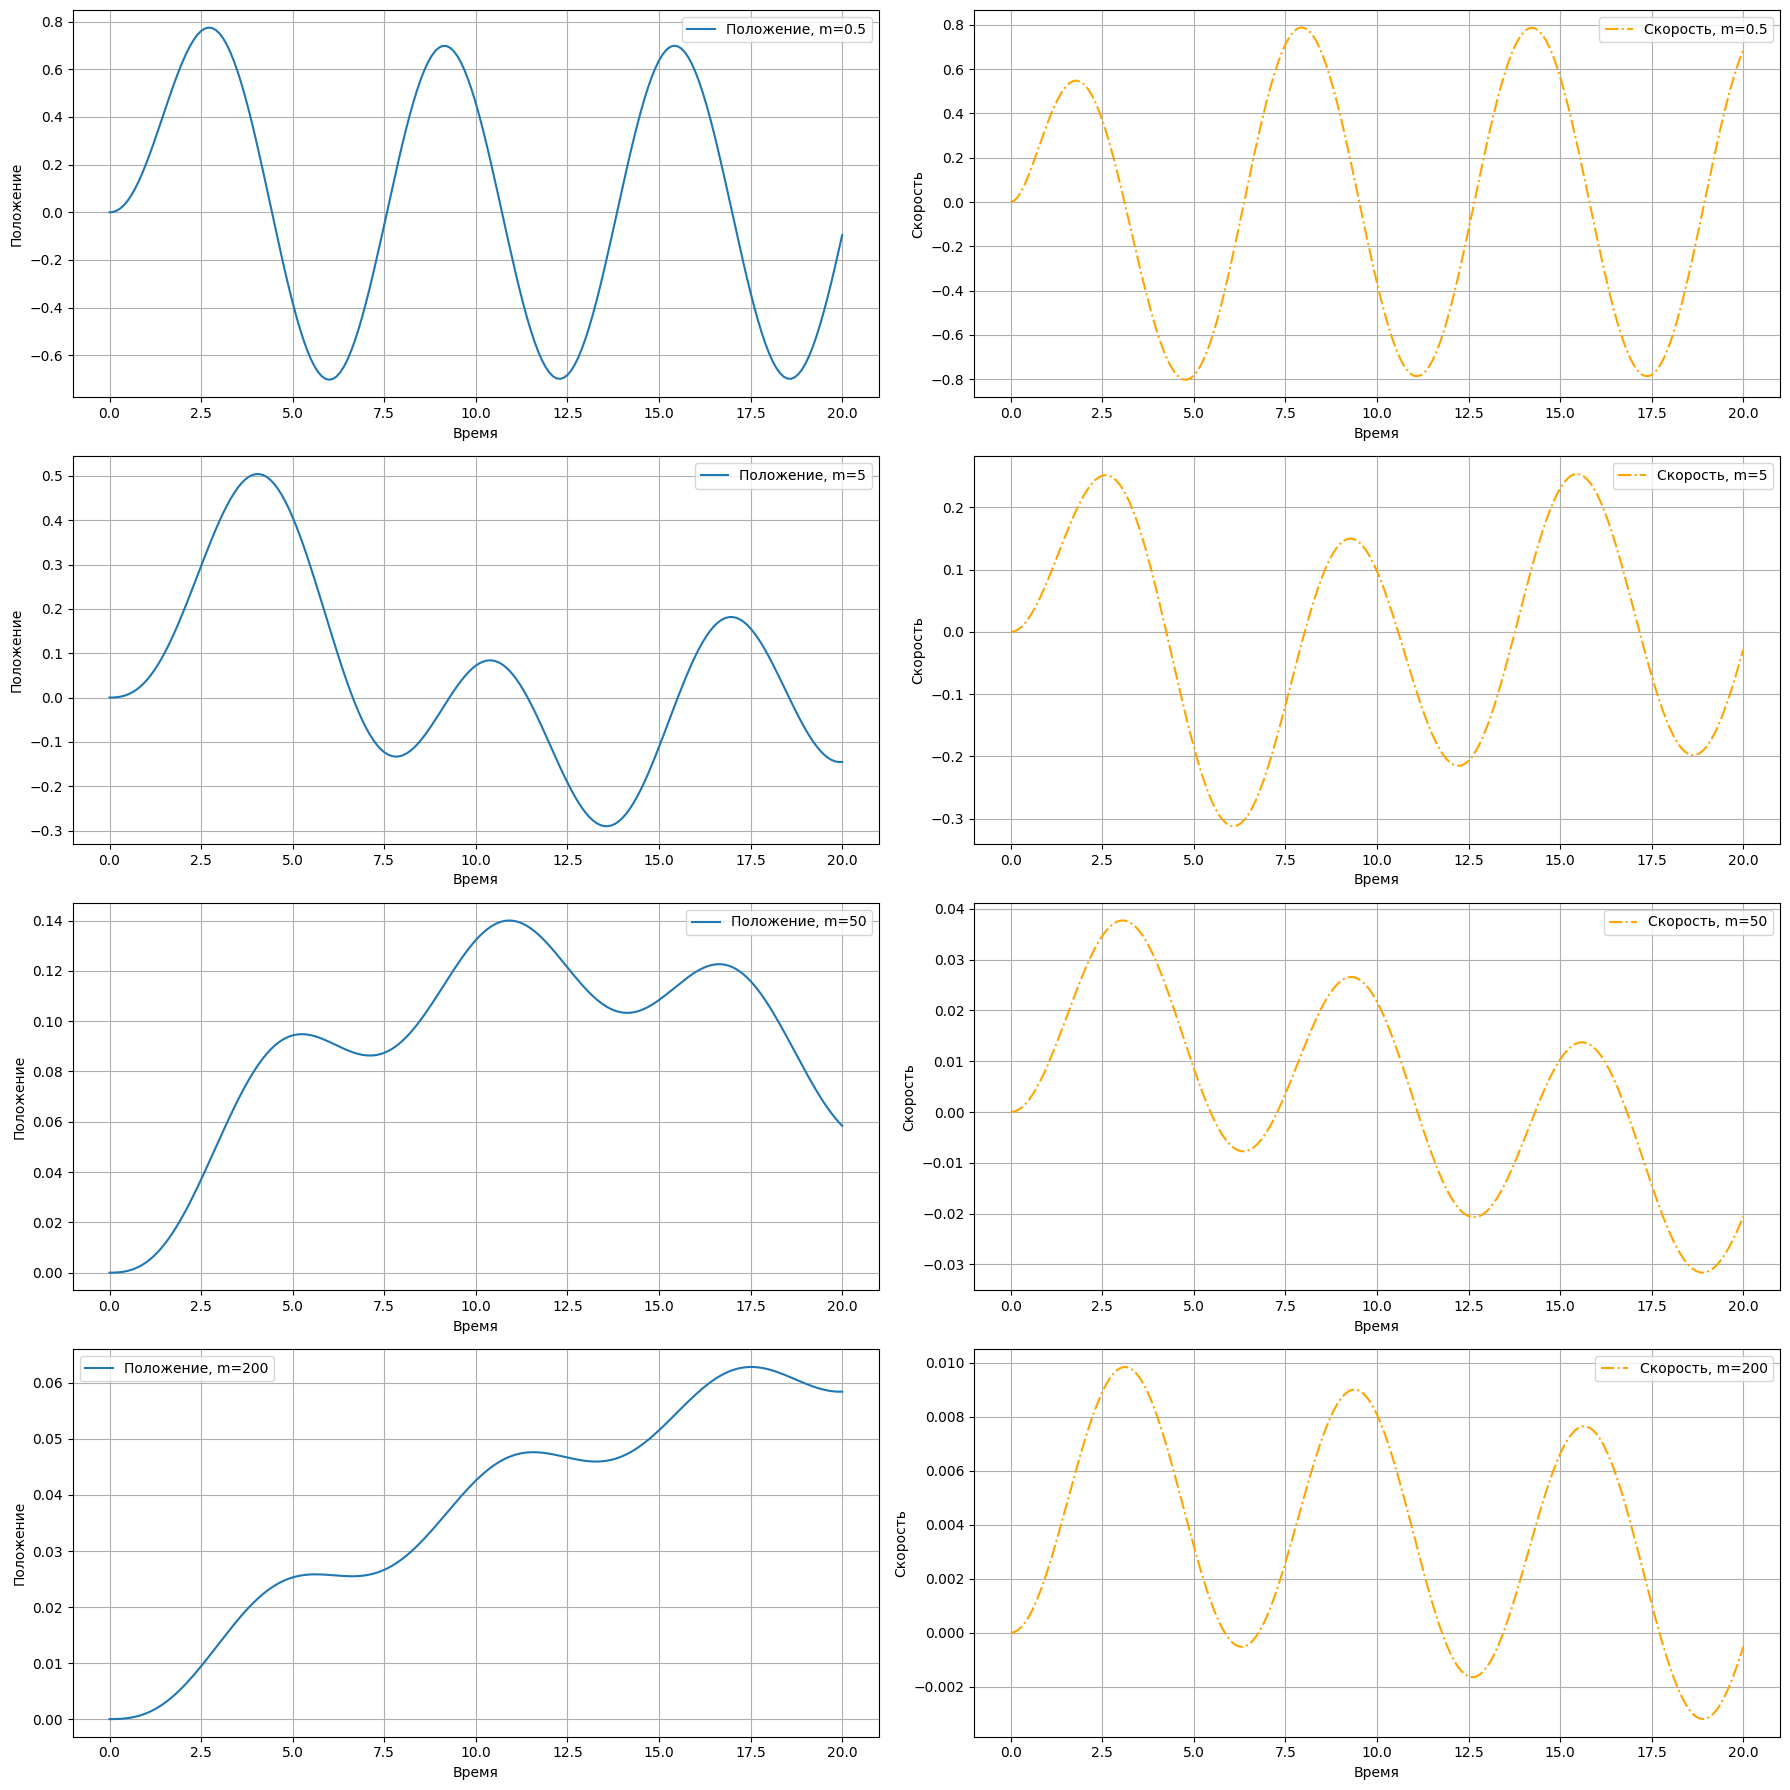

In [14]:

plt.figure(figsize=(18, 18))

for i, m in enumerate(mass):
    t, x = rkfixed(system, t0, y0, T, h, m)
    x1, x2 = np.split(x,2,axis=1)
    plt.subplot(len(mass), 2, 2*i+1)
    plt.plot(t, x1, label=f'Положение, m={m}')
    plt.xlabel('Время')
    plt.ylabel('Положение')
    plt.legend()
    plt.grid(True)

    plt.subplot(len(mass), 2, 2*i+2)
    plt.plot(t, x2, label=f'Скорость, m={m}', ls='-.', color='orange')
    plt.xlabel('Время')
    plt.ylabel('Скорость')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


# ======================= 7.6.2 =======================


In [26]:
Y_A = np.array([[-1.999, -0.019], [-0.063, -1.051]])
Z_A = np.array([[-10.850, 9.787], [32.515, -499.55]])
Y0 = np.array([0, 1])
Z0 = np.array([1, 0])
h = 0.01
T = 1

In [16]:
def euler_explicit(A, Y0, T, h):
    n = int(T / h)
    t = np.linspace(0, T, n+1)
    Y = np.zeros((n+1, len(Y0)))
    Y[0] = Y0
    for i in range(n):
        Y[i+1] = Y[i] + h * A.dot(Y[i])
    return t, Y

def euler_implicit(A, Y0, T, h):
    n = int(T / h)
    t = np.linspace(0, T, n+1)
    Y = np.zeros((n+1, len(Y0)))
    Y[0] = Y0
    I = np.eye(len(Y0))
    for i in range(n):
        Y[i+1] = np.linalg.solve(I - h * A, Y[i])
    return t, Y

In [27]:
t_Y, Y_explicit = euler_explicit(Y_A, Y0, T, h)
t_Z, Z_explicit = euler_explicit(Z_A, Z0, T, h)

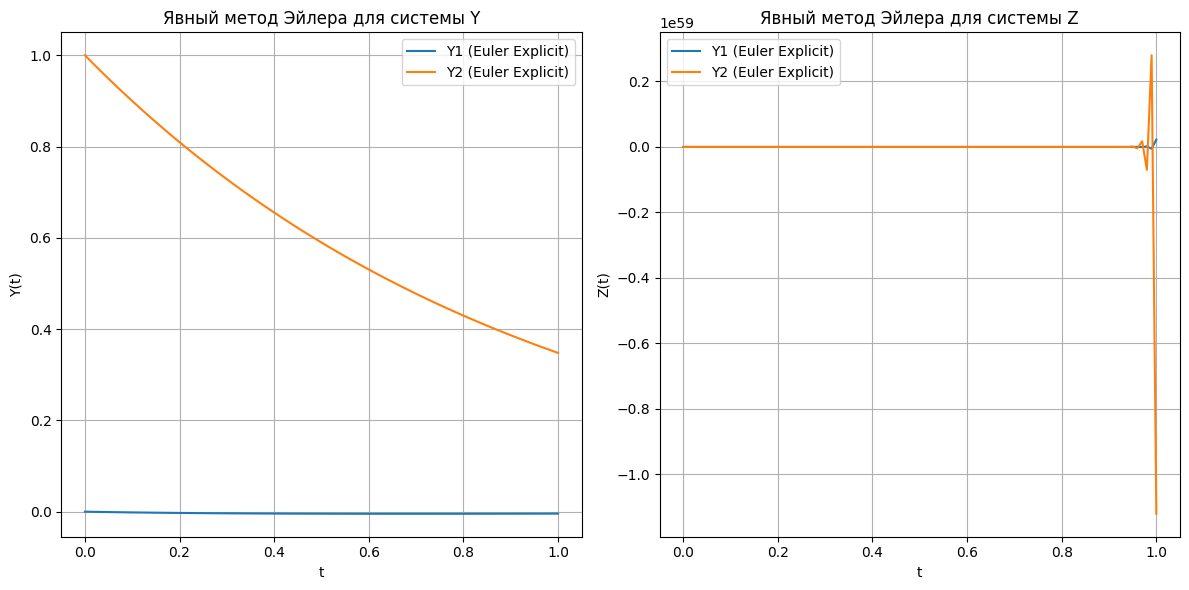

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_Y, Y_explicit[:, 0], label='Y1 (Euler Explicit)')
# plt.plot(Y_explicit[:, 0], Y_explicit[:, 1], label='Y1 (Euler Explicit)')
plt.plot(t_Y, Y_explicit[:, 1], label='Y2 (Euler Explicit)')
plt.xlabel('t')
plt.ylabel('Y(t)')
plt.legend()
plt.grid()
plt.title('Явный метод Эйлера для системы Y')

plt.subplot(1, 2, 2)
plt.plot(t_Z, Z_explicit[:, 0], label='Y1 (Euler Explicit)')
# plt.plot(Z_explicit[:, 0], Z_explicit[:, 1], label='Z1 (Euler Explicit)')
plt.plot(t_Z, Z_explicit[:, 1], label='Y2 (Euler Explicit)')
plt.xlabel('t')
plt.ylabel('Z(t)')
plt.legend()
plt.grid()
plt.title('Явный метод Эйлера для системы Z')

plt.tight_layout()
plt.show()

In [29]:
def check_stability(A, h):
    eigenvalues = np.linalg.eigvals(A)
    unstable_eigenvalues = [ev for ev in eigenvalues if np.abs(1 + h * ev) > 1]
    is_stable = len(unstable_eigenvalues) == 0
    return is_stable, unstable_eigenvalues

# Проверка устойчивости для матрицы A
is_stable_A, unstable_eigenvalues_A = check_stability(Y_A, h)
print(f"Система Y с матрицей Y_A {'устойчива' if is_stable_A else 'неустойчива'} при шаге h={h}")

# Проверка устойчивости для матрицы B
is_stable_B, unstable_eigenvalues_B = check_stability(Z_A, h)
print(f"Система Z с матрицей Z_A {'устойчива' if is_stable_B else 'неустойчива'} при шаге h={h}")


Система Y с матрицей Y_A устойчива при шаге h=0.01
Система Z с матрицей Z_A неустойчива при шаге h=0.01


In [30]:
def analyze_stiffness(A):
    eigenvalues = np.linalg.eig(A)[0]
    print(eigenvalues)
    real_parts = np.abs(np.real(eigenvalues))
    min_real_part = np.min(real_parts)  # Наименьшая реальная часть
    max_real_part = np.max(real_parts)  # Наибольшая реальная часть
    stiffness_ratio = abs(max_real_part) / abs(min_real_part)  # Расчет жесткости
    return stiffness_ratio

print("Жесткость системы Y (матрица A):", analyze_stiffness(Y_A))
print("Жесткость системы Z (матрица B):", analyze_stiffness(Z_A))

[-2.00026098 -1.04973902]
Жесткость системы Y (матрица A): 1.9054840723352096
[ -10.1997004 -500.2002996]
Жесткость системы Z (матрица B): 49.04068551787617


In [38]:
def compute_stable_step(A):
    eigenvalues = np.linalg.eigvals(A)
    max_real_part = np.max(np.abs(np.real(eigenvalues)))  # Максимальная по модулю реальная часть
    h_star = 2 / max_real_part
    return h_star

h_star = compute_stable_step(Z_A)
print(h_star)

0.003998398244846978


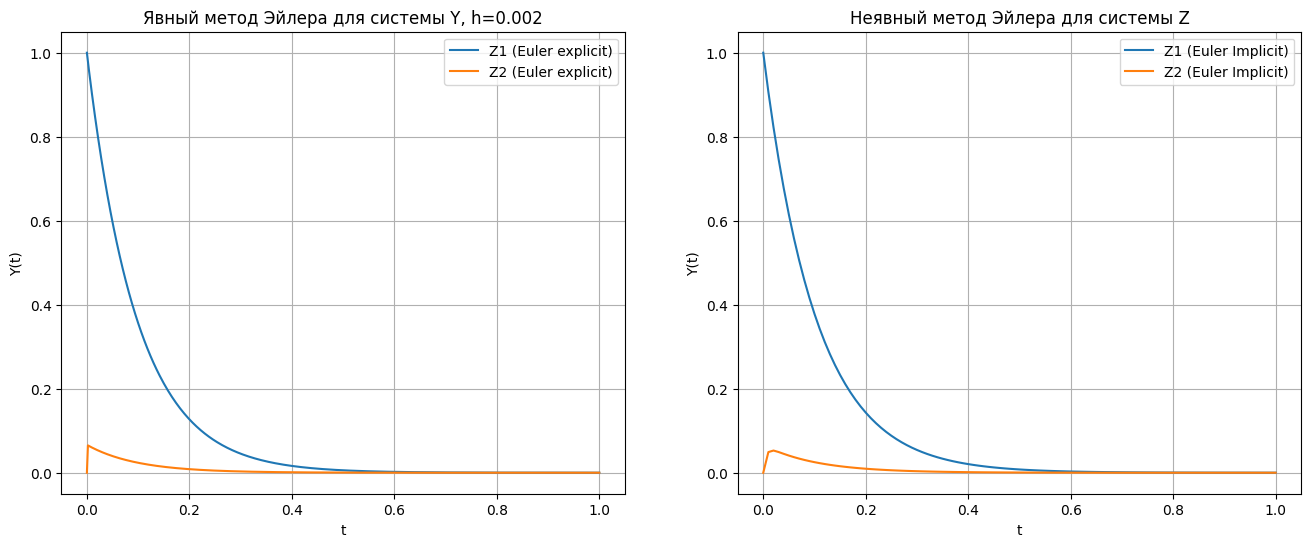

In [44]:

h = 0.002
t_Z, Z_explicit_new = euler_explicit(Z_A, Z0, T, h=h)
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.title(f'Явный метод Эйлера для системы Y, h={h}')
plt.plot(t_Z, Z_explicit_new[:, 0], label='Z1 (Euler explicit)')
plt.plot(t_Z, Z_explicit_new[:, 1], label='Z2 (Euler explicit)')
plt.xlabel('t')
plt.ylabel('Y(t)')
plt.legend()
plt.grid()


t_Z, Z_implicit = euler_implicit(Z_A, Z0, T, h=0.01)

plt.subplot(1,2,2)
plt.title('Неявный метод Эйлера для системы Z')
plt.plot(t_Z, Z_implicit[:, 0], label='Z1 (Euler Implicit)')
plt.plot(t_Z, Z_implicit[:, 1], label='Z2 (Euler Implicit)')
plt.xlabel('t')
plt.ylabel('Y(t)')

plt.legend()
plt.grid()